In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import arange
from matplotlib.ticker import FuncFormatter


turmas_concat = pd.concat([turmas161,turmas162])
turmas_concat.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)

turmas_concat.id_componente = turmas_concat.id_componente.astype(str)
disciplinas.dropna(inplace=True)
disciplinas = disciplinas[~disciplinas.id_componente.duplicated()]
disciplinas.head()

colunas = ["id_turma","id_docente_interno","codigo","nivel_ensino","nome","unidade_responsavel",
          "situacao_turma","capacidade_aluno","descricao_horario"]

# merge os dois dataframes utilizando como base a coluna id_componenteb
merge_turmas_disciplinas = pd.merge(turmas_concat, disciplinas, on='id_componente')[colunas]

merge_turmas_disciplinas.dropna(inplace=True)
merge_turmas_disciplinas.head()

turmas_imd = merge_turmas_disciplinas[merge_turmas_disciplinas.codigo.str.contains("IMD")]
turmas_ect = merge_turmas_disciplinas[merge_turmas_disciplinas.codigo.str.contains("ECT")]

In [2]:
alunos_url16 = 'https://goo.gl/g1sZVa'
alunos16 = pd.read_csv(alunos_url16, sep = ';')

In [3]:
alunos16.dropna(inplace = True)

alunosBTI = alunos16[alunos16.nome_curso == "TECNOLOGIA DA INFORMAÇÃO"]
alunosCET = alunos16[alunos16.nome_curso == "CIÊNCIAS E TECNOLOGIA"]

alunosBTI = alunosBTI[~alunosBTI.nome_discente.duplicated()]
alunosCET = alunosCET[~alunosCET.nome_discente.duplicated()]



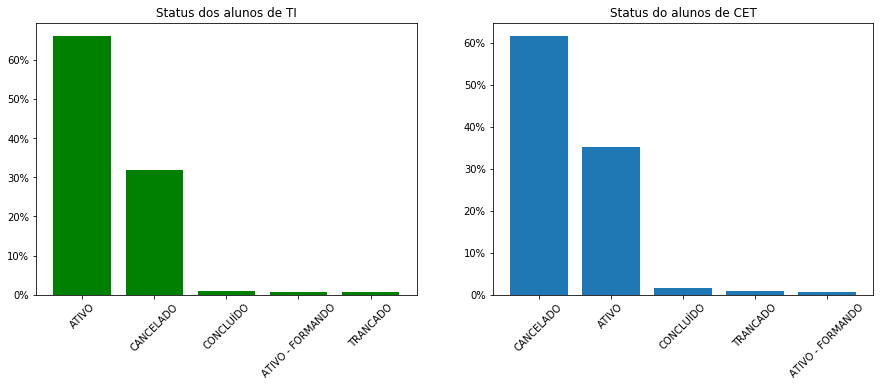

In [5]:
statusBTI = alunosBTI.status.value_counts()
nome_statusBTI = alunosBTI.status[~alunosBTI.status.duplicated()]


statusCET = alunosCET.status.value_counts()
nome_statusCET = alunosCET.status[~alunosCET.status.duplicated()]

soma = 0
for i in statusBTI:
    soma += i

d = {}

for i, j in enumerate(statusBTI):
    d[i] = j/soma * 100

sBTI = pd.Series(d)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Status dos alunos de TI")
bar_position = arange(5)
ax1.bar(bar_position, sBTI, align='center' , color = 'g')
ax1.set_xticklabels(nome_statusBTI , rotation = 45)
ax1.set_xticks(range(0,5))
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax1.yaxis.set_major_formatter(formatter)

soma = 0
for i in statusCET:
    soma += i

d = {}

for i, j in enumerate(statusCET):
    d[i] = j/soma * 100

sCET = pd.Series(d)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Status do alunos de CET")
ax2.bar(bar_position, sCET, align='center')
ax2.set_xticklabels(nome_statusCET, rotation = 45)
ax2.set_xticks(range(0,5))
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax2.yaxis.set_major_formatter(formatter)

plt.show()


In [ ]:
turmas161_url = 'https://goo.gl/MFuhNz'
turmas161 = pd.read_csv(turmas161_url, sep = ';')

turmas162_url = 'https://goo.gl/qSDpFe'
turmas162 = pd.read_csv(turmas162_url, sep = ';')

notas161_url = 'https://goo.gl/96o1xn'
notas161 = pd.read_csv(notas161_url, sep = ';')

notas162_url = 'https://goo.gl/uxAJBe'
notas162 = pd.read_csv(notas162_url, sep = ';')

docentes_url = 'https://goo.gl/LdPmyf'
docentes = pd.read_csv(docentes_url, sep = ';')

disciplinas_url = 'https://goo.gl/gBY8eT'
disciplinas = pd.read_csv(disciplinas_url, sep = ';',usecols=["id_componente","codigo","nivel","nome","unidade_responsavel"])
